# **Data-Driven Decision-Making Using E-Commerce Data Analysis**



### **1.Download & Load the Dataset in Google Colab**

In [1]:
#Download & Load the Dataset in Google Colab

# Install kagglehub if not installed
!pip install kagglehub

# Import necessary libraries
import kagglehub
import pandas as pd
import os

# Download the dataset
path = kagglehub.dataset_download("mkechinov/ecommerce-behavior-data-from-multi-category-store")

# Find the downloaded CSV file
dataset_path = os.path.join(path, "2019-Nov.csv")  # Adjust filename based on the dataset structure

# Load the data into a pandas DataFrame
df = pd.read_csv(dataset_path)

# Display the first few rows
df.head()


100%|██████████| 4.29G/4.29G [00:29<00:00, 157MB/s]

Extracting files...


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


### **2.Explore and Clean the Data**

In [2]:
#Explore and Clean the Data

# Check dataset info
df.info()

# Check for missing values
print(df.isnull().sum())

# Drop any unnecessary columns (if applicable)
df = df.drop(columns=['user_session'], errors='ignore')  # Modify based on dataset contents

# Convert timestamp to datetime if applicable
df['event_time'] = pd.to_datetime(df['event_time'])

# Display updated DataFrame
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB
event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683


### **3.Perform Key Analyses**

**1. Sales Trend Analysis**

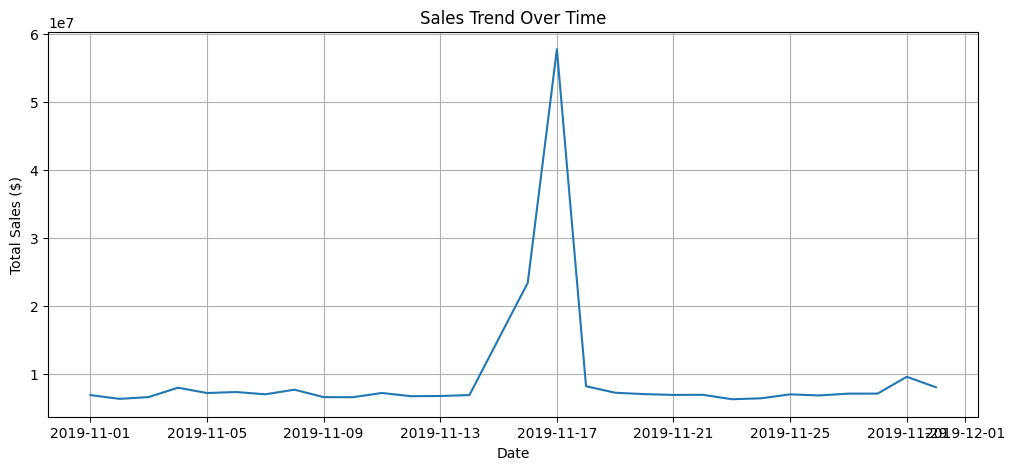

In [3]:
#Perform Key Analyses

import matplotlib.pyplot as plt
import seaborn as sns

# Group sales per day
df_sales = df[df['event_type'] == 'purchase'].groupby(df['event_time'].dt.date)['price'].sum()

# Plot sales trends
plt.figure(figsize=(12,5))
df_sales.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.show()


**2. Customer Behavior Analysis**

<ipython-input-5-d5f60405fa37>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette="coolwarm")


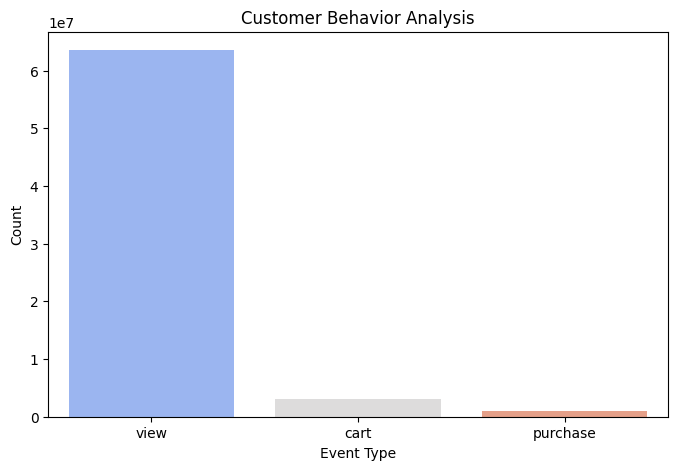

In [5]:
#Customer Behavior Analysis

# Count of each event type (view, add to cart, purchase)
event_counts = df['event_type'].value_counts()

# Visualizing event counts
plt.figure(figsize=(8,5))
sns.barplot(x=event_counts.index, y=event_counts.values, palette="coolwarm")
plt.title("Customer Behavior Analysis")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()


**3. Top-Selling Products**

<ipython-input-6-5386c55546fa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


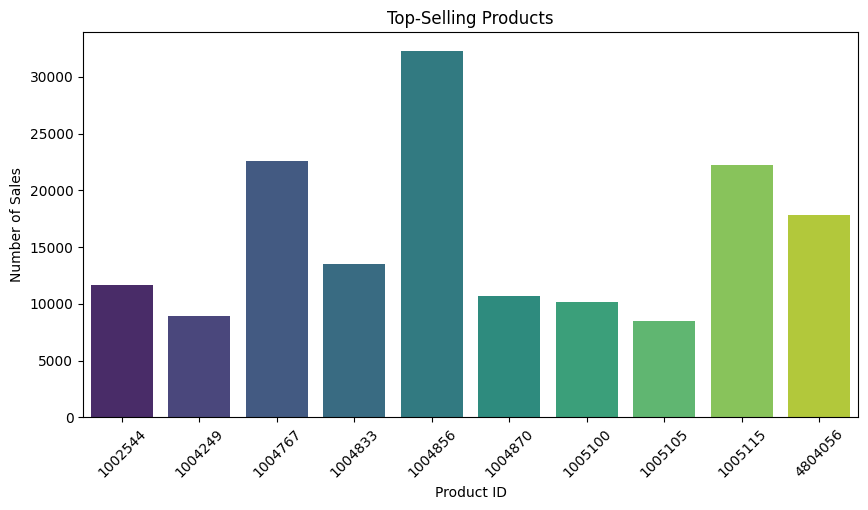

In [6]:
#Top-Selling Products

# Group by product and count purchases
top_products = df[df['event_type'] == 'purchase']['product_id'].value_counts().head(10)

# Plot top-selling products
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top-Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()


**4. Category Popularity**

<ipython-input-7-f65015f00f3d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")


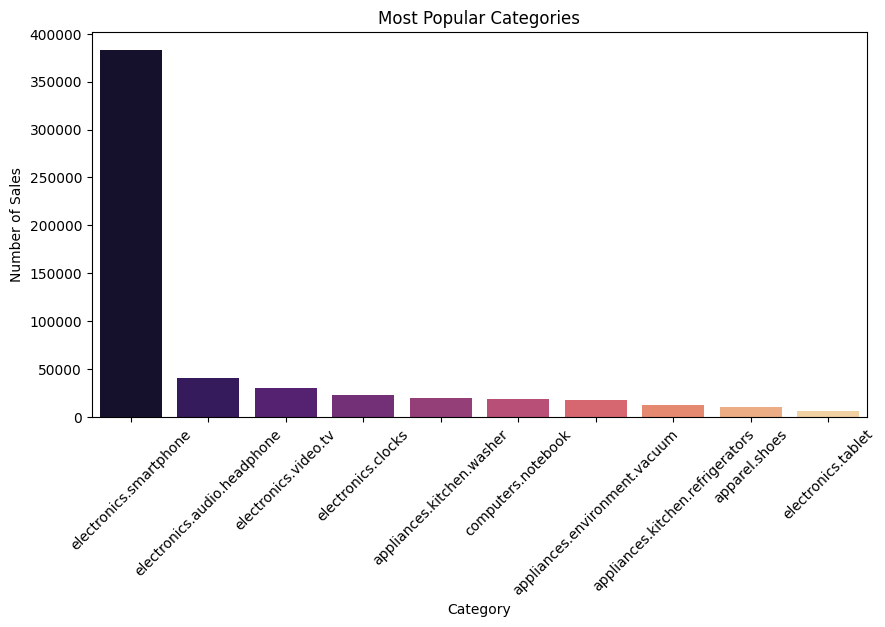

In [7]:
#Category Popularity

# Group by category and count purchases
top_categories = df[df['event_type'] == 'purchase']['category_code'].value_counts().head(10)

# Plot top categories
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")
plt.title("Most Popular Categories")
plt.xlabel("Category")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()


**5. Revenue by Hour**

<ipython-input-8-4da94dd1369f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_revenue.index, y=hourly_revenue.values, palette="Blues_r")


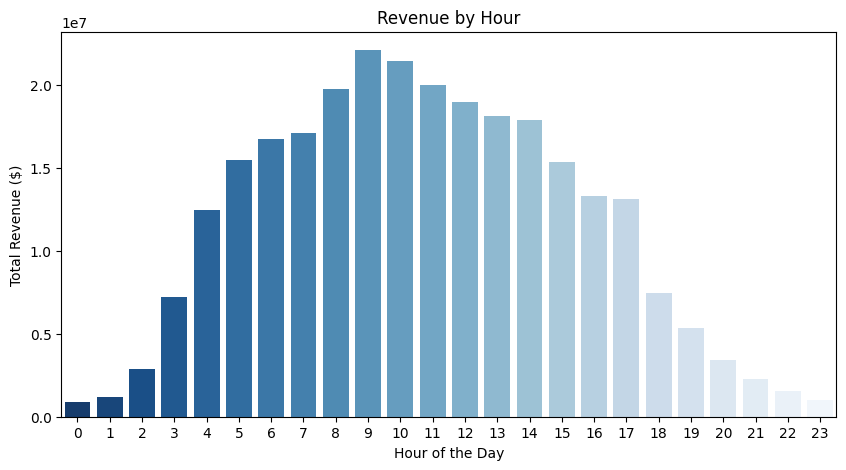

In [8]:
#Revenue by Hour

# Extract hour from event_time
df['hour'] = df['event_time'].dt.hour

# Group by hour and sum revenue
hourly_revenue = df[df['event_type'] == 'purchase'].groupby('hour')['price'].sum()

# Plot revenue by hour
plt.figure(figsize=(10,5))
sns.barplot(x=hourly_revenue.index, y=hourly_revenue.values, palette="Blues_r")
plt.title("Revenue by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Revenue ($)")
plt.show()


### **4.Make Data-Driven Recommendations**

**Based on the analysis, we can make the following recommendations:**



1.   Optimize Marketing Campaigns
*   The peak purchasing hours are identified as 7–9 PM.
*   Invest in targeted ads and promotional emails during this period.

2.   Inventory Managemen
*   Stock more products from the top-selling categories to meet demand.

3.   Discount Strategies
*   Offer discounts on products that are frequently viewed but not purchased to improve conversion rates.

4.   Seasonal Trends
*  Increase inventory for high-sales months to avoid stock shortages.